# self defined classifier in sklearn
Goal of this lab
- learn how to define a classifier in sklearn
- An example of bitcoin trading strategy.

data source: [bitcoin history price in Kaggle](https://www.kaggle.com/mczielinski/bitcoin-historical-data)

references [Kaggle clean data challenge](https://www.kaggle.com/rtatman/data-cleaning-challenge-handling-missing-values?utm_medium=email&utm_source=mailchimp&utm_campaign=5DDC-data-cleaning),
[Create your own class for sklearn](http://danielhnyk.cz/creating-your-own-estimator-scikit-learn/)

In [5]:
import pandas as pd
import numpy as np
import sklearn as sk

In [6]:
raw = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2018-03-27.csv')

In [15]:
# take a look at some samples
raw.sample(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
1486348,1510094100,7065.00,7065.00,7064.99,7065.00,1.679012,11862.221205,7064.999544
649805,1459901520,422.49,422.61,422.32,422.61,3.114530,1315.990228,422.532526
1333876,1500945780,2764.71,2764.71,2764.70,2764.71,3.159454,8734.962928,2764.706212
741056,1465376580,579.23,579.26,579.20,579.26,0.355660,206.009738,579.232238
232900,1434887220,245.51,245.51,245.51,245.51,2.094400,514.196144,245.510000
749264,1465869060,693.98,693.98,693.50,693.50,17.129350,11879.861751,693.538386
906643,1475311800,612.88,612.88,612.88,612.88,0.080880,49.569734,612.880000
1399743,1504897800,4325.48,4325.48,4325.46,4325.46,12.239368,52940.976670,4325.466371
281241,1437787680,287.65,287.65,287.65,287.65,0.285800,82.210370,287.650000
1136556,1489106580,1205.99,1205.99,1205.99,1205.99,0.257000,309.939430,1205.990000


In [26]:
raw.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,1417412040,300.0,300.0,300.0,300.0,0.01,3.0,300.0
2,1417412100,300.0,300.0,300.0,300.0,0.01,3.0,300.0
3,1417412160,300.0,300.0,300.0,300.0,0.01,3.0,300.0
4,1417412220,300.0,300.0,300.0,300.0,0.01,3.0,300.0


In [44]:
# how many rows
print("Number of rows: %d \n" % raw.shape[0])
print("Range of timestamples %d \n" % (raw['Timestamp'].iloc[-1] - raw['Timestamp'].iloc[0]))

Number of rows: 1686594 

Range of timestamples 104696820 



In [11]:
# see how many missing values we have
raw.isnull().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

In [18]:
# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5,1,'Weighted price')

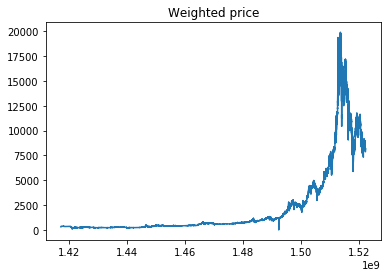

In [62]:
# plot the weighted price
plt.plot(raw.Timestamp, raw.Weighted_Price)
plt.title("Weighted price")

In [25]:
# deal with date time
import datetime

In [36]:
print(datetime.datetime.fromtimestamp(raw.Timestamp.iloc[0]))
print(datetime.datetime.fromtimestamp(raw.Timestamp.iloc[1]))
print(datetime.datetime.fromtimestamp(raw.Timestamp.iloc[-1]))

2014-11-30 21:33:00
2014-11-30 21:34:00
2018-03-26 17:00:00


In [37]:
dates = [datetime.datetime.fromtimestamp(i) for i in raw.Timestamp]

In [41]:
raw['dates'] = pd.Series(dates, index=raw.index)

In [42]:
raw.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,dates
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-11-30 21:33:00
1,1417412040,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-11-30 21:34:00
2,1417412100,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-11-30 21:35:00
3,1417412160,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-11-30 21:36:00
4,1417412220,300.0,300.0,300.0,300.0,0.01,3.0,300.0,2014-11-30 21:37:00


In [43]:
raw['Volume_(BTC)'].describe()

count    1.686594e+06
mean     7.675075e+00
std      1.810103e+01
min      1.000000e-08
25%      7.582000e-01
50%      2.598192e+00
75%      7.639615e+00
max      1.563267e+03
Name: Volume_(BTC), dtype: float64

In [46]:
diff_time = [raw['Timestamp'][i] - raw['Timestamp'][i-1] for i in range(1, raw.shape[0])]

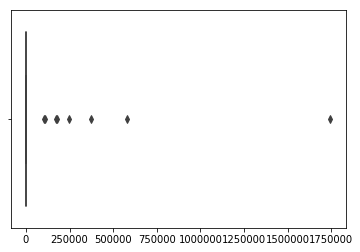

In [56]:
sns.boxplot(diff_time)


In [59]:
# longest number of days not traded
print("longest number of days not traded: %d days" % (max(diff_time)/3600/24))

longest number of days not traded: 20 days


Text(0.5,1,'number of records each day')

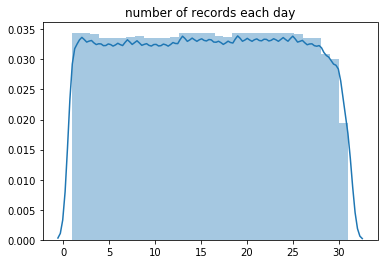

In [76]:
sns.distplot([i.day for i in raw.dates], bins=31).set_title('number of records each day')

In [109]:
min(raw['Weighted_Price'])

0.06

In [77]:
from sklearn.base import BaseEstimator

In [123]:
class TradingStragety(BaseEstimator):
    """My trading strategy"""
    def __init__(self, buy_thres = .99, sell_thres = 1.02):
        self.buy_thres = buy_thres
        self.sell_thres = sell_thres
    def fit(self, X, y = None):
        assert self.buy_thres < 1, "buy threshold should be smaller than 1 but %f given"%self.buy_thres
        candidate_volume = [1e-1, 1, 10, 20, 50]
        scores = [self._profit(X, volume) for volume in candidate_volume]
        self.volume_ = candidate_volume[np.argmax(scores)]
        return self
    def _profit(self, prices, volume):
        btc = 0
        usd = 0
        history = [0]
        for row_ind in range(len(prices)):
            if row_ind == 0:
                continue
            price = prices[row_ind]
            if price > prices[row_ind - 1] * self.sell_thres:
                btc += volume/price
                usd -= volume
                history.append(volume)
            elif price < prices[row_ind - 1] * self.buy_thres:
                btc -= volume/price
                usd += volume
                history.append(volume )
        return (usd + btc * prices[-1])
    def predict(self, X, y=None):
        action = []
        for row_ind in range(len(prices)):
            if row_ind == 0:
                action.append(0)
                continue
            price = prices[row_ind]
            if price > prices[row_ind - 1] * self.sell_thres:
                action.append(-1)
            elif price < prices[row_ind - 1] * self.buy_thres:
                action.append(1)
        return action
    def score(self, X, y=None):
        return self._profit(X, self.volume_)

In [142]:
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
start_date = datetime.datetime.today() - datetime.timedelta(days=90)
mask = raw['dates'] > start_date
X = np.array(raw['Weighted_Price'].loc[mask])
y = [1 for i in X]
splitter = TimeSeriesSplit(n_splits=3)
for train_index, test_index in splitter.split(X):
    X_train, X_test = X[train_index], X[test_index]
    
tuned_params = {"buy_thres" : [.999], "sell_thres": [1.002, 1.003]}

gs = GridSearchCV(TradingStragety(), tuned_params)

# for some reason I have to pass y with same shape
# otherwise gridsearch throws an error. Not sure why.
gs.fit(X_train, y=[1 for i in range(len(X_train))])

gs.best_params_ # {'intValue': -10} # and that is what we expect :)  

{'buy_thres': 0.999, 'sell_thres': 1.002}

In [143]:
gs.best_score_

-5463.531784845062

In [144]:
tr = TradingStragety()
tr.fit(X_train)
tr.volume_

0.1

In [145]:
min(X_train)

5883.3949116